# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Answer: return customer activity score

#### 2. What are the predictors/covariates? 

Answer: age, gender, location, profession, days since last log in, acitivity score

#### 3. What timeframe is this data relevent for?

Answer: Jan 2015-April 2015

#### 4. What is the hypothesis?

Answer: Demographic and customer useage data info will predict if free-tier customer will convert to paying customer

## Let's get started with our dataset

#### 1. Create a data dictionary 

Answer: 

Variable | Description | Type of Variable
---| ---| ---
admit | 0 = not admit, 1 = admit | binary
gre | integer | continuous 
gpa | integer | continuous
prestige | 1 = low, 2= medium-low, 3= medium-high, 4= high | categorical


We would like to explore the association between X and Y 

#### 2. What is the outcome?

Answer: return student admission to graduate program (yes/no)

#### 3. What are the predictors/covariates? 

Answer: gre, gpa, prestige

#### 4. What timeframe is this data relevent for?

Answer n/a

#### 4. What is the hypothesis?

Answer: Will two or more factors (i.e. GPA, Prestige, or GRE) influence admmission into graduate school?

    Using the above information, write a well-formed problem statement. 


## Problem Statement

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: To concisely describe important features of a data set with a few numbers. 

#### 2a. What are the assumptions of the distribution of data? 

Answer: 
1. Distribution is a normal distribution. 
2. Data from multiple groups have the same variance. 
3. Data have linear relationships
4. Data are independent
5. No minimum GPA requirements for admittance

#### 2b. How will determine the distribution of your data? 

Answer: Plotting distribution, box and whisker plots, performing summary statistics, performing a linear regression, scatter plot

#### 3a. How might outliers impact your analysis? 

Answer: Might skew the distrubtion of the data. Inflate the variance of model, kurtusis, summary statistics

#### 3b. How will you test for outliers? 

Answer: visual representations, box and whisker plots, build a model and see what is rejected by model

#### 4a. What is colinearity? 

Answer: When two or more variables in a regression model are highly correlated and can be linearly predicted with high precision. 

#### 4b. How will you test for colinearity? 

Answer: 1. Calculating correlation using Pearson correlation coefficient for approximately normally distributed variables or Spearman rank correlation coefficient for ordinal variables. 2. Finding association between nominal variables using chi-square test and P-value. 3. Finding association between a categorical and a continuous variables using t-test(when categorical variable has 2 categories) and ANOVA (>2 categories).

#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer: 

Exploratory Data Analysis
Admissions.csv

1.	Graphical and Quantitative EDA

     a.	Generate plots
     
            i. Histogram/Distribution
                1.	GRE
                2.	GPA
                3.	Prestige
            ii. Box and Whisker
                1.	GRE
                2.	GPA
                3. Prestige

            
    b.	Compute summary statistics for each variable
    
            i.	mean, median, mode, max, min, range, standard deviation, quartiles
        
    c.	Test for collinearity
    
            i.	Calculate correlation using Pearson correlation coefficient 
        
            ii.	Find association between categorical variables using chi-square test and P-value.
        
            iii. Find association between a categorical and a continuous variable using t-test (when categorical variable has 2 categories) and ANOVA (>2 categories).
        
        
2.	Estimate parameters

    a.	Bootstrap sampling
    
            i.	GPA and GRE average 50th percentile scores for admittance=1
        
            ii.	Generate plots and summary statistics for bootstrap samples
        
    b.	Determine confidence intervals
    

3.	Formulate and test hypothesis

    a.	Assumptions
    
            i.	Distribution is a normal distribution
        
            ii.	Data from multiple groups have the same variance
        
            iii.	Data have linear relationships
        
            iv.	Data are independent
        
    b.	Hypothesis
    
            i.	Will two or more factors (i.e. GPA, GRE, Prestige) influence admissions into graduate school? What is the average admittance rate for someone with a high GPA and high GRE score (90th percentile) versus someone with a low GPA and low GRE score (50th percentile) excluding prestige and including prestige. 



## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model

In [33]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt

In [34]:
df = pd.read_csv('admissions.csv')
df= df.dropna()
gre = np.array(df.gre)
gpa = np.array(df.gpa)
prestige = np.array(df.prestige)
admit = np.array(df.admit)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 4 columns):
admit       397 non-null int64
gre         397 non-null float64
gpa         397 non-null float64
prestige    397 non-null float64
dtypes: float64(3), int64(1)
memory usage: 35.5 KB


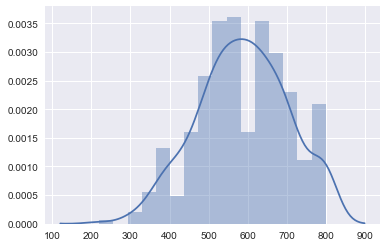

In [39]:
sns.distplot(gre)

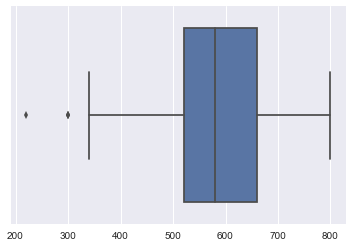

In [40]:
sns.boxplot(gre)

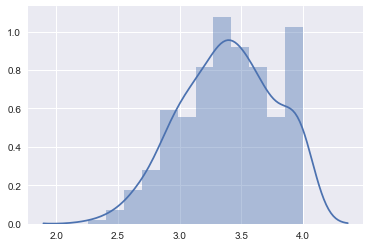

In [49]:
sns.distplot(gpa)

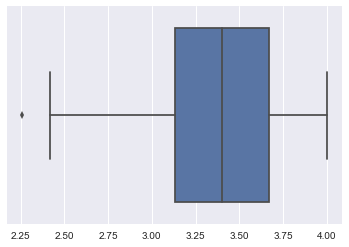

In [50]:
sns.boxplot(gpa)

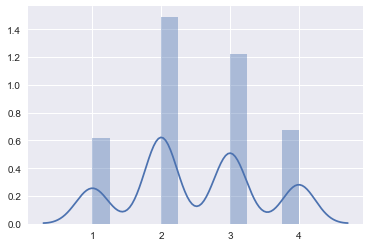

In [51]:
sns.distplot(prestige)

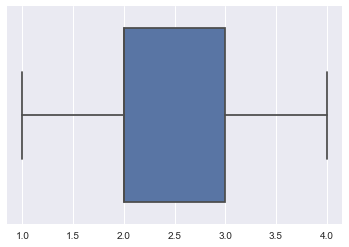

In [76]:
sns.boxplot(prestige)

In [55]:
df['gre'].describe()

count    397.000000
mean     587.858942
std      115.717787
min      220.000000
25%      520.000000
50%      580.000000
75%      660.000000
max      800.000000
Name: gre, dtype: float64

In [57]:
df['gpa'].describe()

count    397.000000
mean       3.392242
std        0.380208
min        2.260000
25%        3.130000
50%        3.400000
75%        3.670000
max        4.000000
Name: gpa, dtype: float64

In [58]:
df['prestige'].describe()

count    397.000000
mean       2.488665
std        0.947083
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: prestige, dtype: float64

In [70]:
np.corrcoef(admit, gre)

array([[ 1.        ,  0.18120207],
       [ 0.18120207,  1.        ]])

In [71]:
np.corrcoef(admit, gpa)

array([[ 1.        ,  0.17411638],
       [ 0.17411638,  1.        ]])

In [72]:
np.corrcoef(admit, prestige)

array([[ 1.        , -0.24356303],
       [-0.24356303,  1.        ]])

In [73]:
np.corrcoef(gre, gpa)

array([[ 1.        ,  0.38240821],
       [ 0.38240821,  1.        ]])

In [74]:
np.corrcoef(gre, prestige)

array([[ 1.        , -0.12453252],
       [-0.12453252,  1.        ]])

In [75]:
np.corrcoef(gpa, prestige)

array([[ 1.        , -0.06097617],
       [-0.06097617,  1.        ]])

In [121]:
admitted = df[df['admit']==1]
not_admitted = df[df['admit']==0]

In [103]:
def draw_bootstrap_percentile(data, percentile):
    sample_from_samples = np.random.choice(data, size=len(data), replace=True)
    return np.percentile(sample_from_samples, percentile)

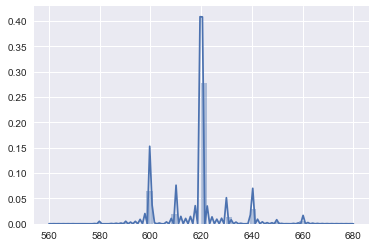

In [148]:
gre_50_a = [draw_bootstrap_percentile(admitted['gre'], 50) for i in range(100000)]
sns.distplot(gre_50_a)

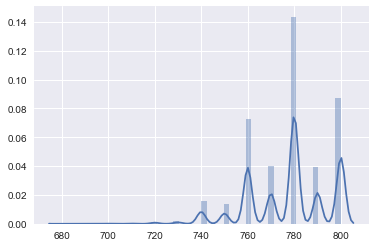

In [141]:
gre_90_a = [draw_bootstrap_percentile(admitted['gre'], 90) for i in range(100000)]
sns.distplot(gre_90_a)

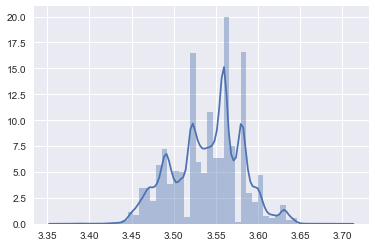

In [149]:
gpa_50_a = [draw_bootstrap_percentile(admitted['gpa'], 50) for i in range(100000)]
sns.distplot(gpa_50_a)

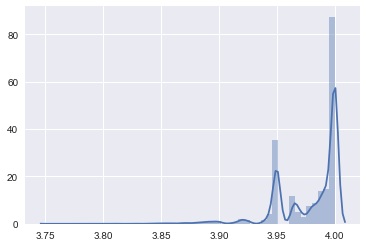

In [145]:
gpa_90_a = [draw_bootstrap_percentile(admitted['gpa'], 90) for i in range(100000)]
sns.distplot(gpa_90_a)